# Investigate Movie Dataset

***

The data comes from the kaggle. It contains information about 7000 movies *(1980-2020)* collected from IMDb, including company, budget and gross revenue.

#### I am interested to learn more about
### 1. Which genres are most popular from year to year?
### 2. What kind of properties are assoicated with movies that have high gross revenue?
### 3. What are the top 10 most profitable movies?

**Tool used**:   Python *(Pandas, Numpy, Matplolib, seaborn)*

***

# Explore the Data

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read movies.csv as a dataframe called df

In [2]:
df = pd.read_csv('movies.csv')

### Check the head of the DataFrame

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### Use the .info() method to find out how many entries there are

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


### Inspect the missing data in %

In [5]:
for col in df.columns:
    missing = np.mean(df[col].isnull())
    print ('{}: {}%'.format(col, round(missing*100)))

name: 0%
rating: 1%
genre: 0%
year: 0%
released: 0%
score: 0%
votes: 0%
director: 0%
writer: 0%
star: 0%
country: 0%
budget: 28%
gross: 2%
company: 0%
runtime: 0%


***

# Data Cleanning

### Filter out budget that are less than 0

In [6]:
df_cleanned = df[df['budget'] > 0]

### Replace null values with 0

In [7]:
df_cleanned = df.fillna(0)
# df_cleanned = df.dropna()

### No More missing values

In [8]:
for col in df_cleanned.columns:
    missing = np.mean(df_cleanned[col].isnull())
    print ('{}: {}%'.format(col, round(missing*100)))

name: 0%
rating: 0%
genre: 0%
year: 0%
released: 0%
score: 0%
votes: 0%
director: 0%
writer: 0%
star: 0%
country: 0%
budget: 0%
gross: 0%
company: 0%
runtime: 0%


### Change data type of columns

In [9]:
# drop decimals of votes, budget and gross

df_cleanned['votes'] = df_cleanned['votes'].astype('int64')
df_cleanned['budget'] = df_cleanned['budget'].astype('int64')
df_cleanned['gross'] = df_cleanned['gross'].astype('int64')

In [10]:
df_cleanned.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


###  Drop columns that won't be used in analysis

In [11]:
df_cleanned = df_cleanned.drop(columns = ['released'])
df_cleanned = df_cleanned.drop(columns = ['writer'])

In [12]:
df_cleanned.head()

,name,rating,genre,year,score,votes,director,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


***




# Data Analysis

## Question 1: Which genres are most profitable from year to year?

### Create new column -- calculate net profit for each movie

In [13]:
df_cleanned['net profit'] = df_cleanned['gross'] - df_cleanned['budget']

In [14]:
df_cleanned

,name,rating,genre,year,score,votes,director,star,country,budget,gross,company,runtime,net profit
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,27998772
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,54353106
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,520375067
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,79953539
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,33846344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,3.1,18,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90.0,-7000
7664,Dream Round,0,Comedy,2020,4.7,36,Dusty Dukatz,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,0
7665,Saving Mbango,0,Drama,2020,5.7,29,Nkanya Nkwai,Onyama Laura,United States,58750,0,Embi Productions,0.0,-58750
7666,It's Just Us,0,Drama,2020,0.0,0,James Randall,Christina Roz,United States,15000,0,0,120.0,-15000


### Show distinct genre value

In [15]:
df_cleanned['genre'].drop_duplicates().sort_values

<bound method Series.sort_values of 0           Drama
1       Adventure
2          Action
3          Comedy
5          Horror
7       Biography
14          Crime
23        Fantasy
40         Family
59         Sci-Fi
71      Animation
156       Romance
162         Music
202       Western
262      Thriller
474       History
1382      Mystery
7600        Sport
7613      Musical
Name: genre, dtype: object>

### Use groupby() method to list out the genre with average proft each year

In [16]:
df1 = df_cleanned.groupby(['year','genre'])['net profit'].mean().reset_index()

In [17]:
df1

,year,genre,net profit
0,1980,Action,5.476442e+07
1,1980,Adventure,1.267035e+07
2,1980,Animation,1.090322e+06
3,1980,Biography,5.006630e+06
4,1980,Comedy,1.784674e+07
...,...,...,...
410,2020,Comedy,1.377927e+05
411,2020,Crime,3.661000e+03
412,2020,Drama,2.298345e+07
413,2020,Horror,6.633000e+03


In [18]:
df2 = df1[df1['net profit'] == df1.groupby(['year'])['net profit'].transform('max')]

In [19]:
df2.head()

,year,genre,net profit
0,1980,Action,5.476442e+07
11,1981,Action,3.185475e+07
29,1982,Family,7.824106e+08
35,1983,Action,2.348295e+07
47,1984,Action,4.176477e+07


### Use bar chart to visualize the most profitable genre over all these years

Text(0.5, 1.0, 'Most Profitable Genre')

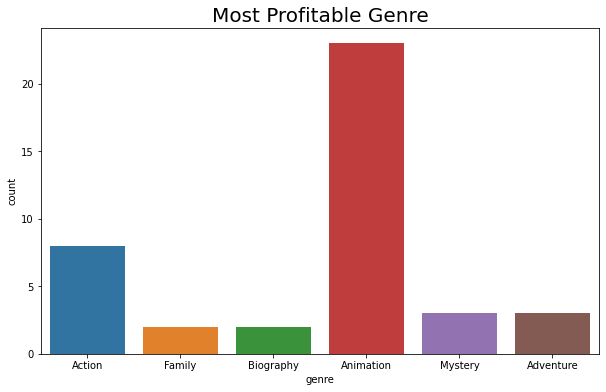

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(x='genre',data = df2)
plt.title('Most Profitable Genre', fontsize = 20)

### We can see that Animation movies are the most profitable genre over the years

***

## Question 2: What kind of properties are assoicated with movies that have high gross revenue?

### Hypothesis: 
- **Budget** highly correlated to the gross revenue

### Sort the data by Gross Revenue

In [21]:
df_cleanned.sort_values(by=['gross'], ascending=False).head(10)

,name,rating,genre,year,score,votes,director,star,country,budget,gross,company,runtime,net profit
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2610246203
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2441501328
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,2001647264
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,1824521700
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,1727359754
7480,The Lion King,PG,Animation,2019,6.9,222000,Jon Favreau,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,1410727580
6653,Jurassic World,PG-13,Action,2015,7.0,593000,Colin Trevorrow,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,1520516444
6043,The Avengers,PG-13,Action,2012,8.0,1300000,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,1298815515
6646,Furious 7,PG-13,Action,2015,7.1,370000,James Wan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137.0,1325341399
7494,Frozen II,PG,Animation,2019,6.8,148000,Chris Buck,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103.0,1300026933


> ## Budget

### Use scatter plot to visualize budget vs gross

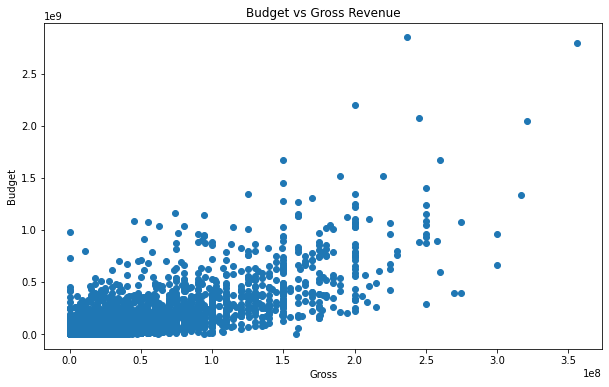

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(x=df_cleanned['budget'],y=df_cleanned['gross'])
plt.title('Budget vs Gross Revenue')
plt.xlabel('Gross')
plt.ylabel('Budget')
plt.show()

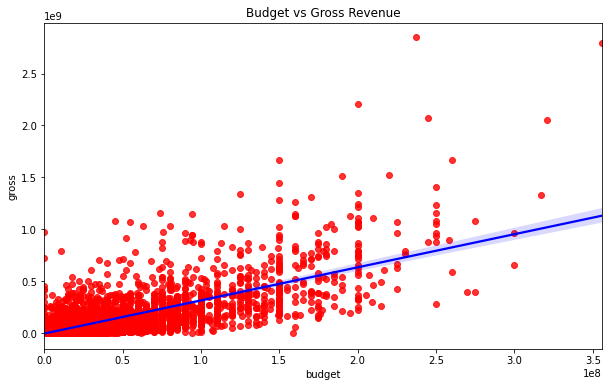

In [23]:
# add trendline using seaborn

plt.figure(figsize=(10,6))
sns.regplot(x='budget',y='gross', data=df_cleanned, scatter_kws={"color":"red"},line_kws={"color":"blue"})
plt.title('Budget vs Gross Revenue')
plt.show()

### Use heatmap to visualize the correlation between the budget and Gross

In [24]:
df_cleanned.corr()

,year,score,votes,budget,gross,runtime,net profit
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358,0.225727
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564,0.205976
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984,0.618469
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372,0.614473
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339,0.982644
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000,0.216231
net profit,0.225727,0.205976,0.618469,0.614473,0.982644,0.216231,1.000000


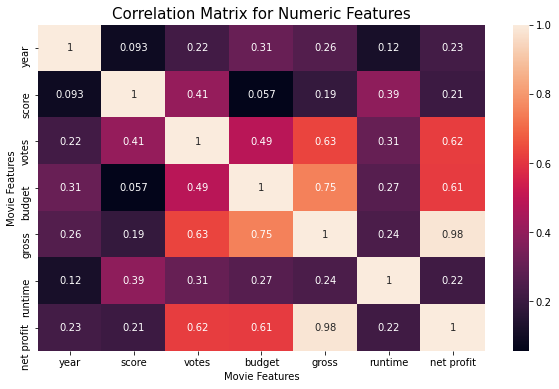

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(df_cleanned.corr(), annot=True)
plt.title('Correlation Matrix for Numeric Features', fontsize = 15)
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

### Strong correlation, 0.75 between Budget and Gross

***

## Question 3: What are the top 10 most profitable movies?

### Sort the data by profit

In [26]:
df_cleanned = df_cleanned.sort_values(by=['net profit'], ascending=False)

In [27]:
df_top10 = df_cleanned.head(10)

In [28]:
df_top10

,name,rating,genre,year,score,votes,director,star,country,budget,gross,company,runtime,net profit
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2610246203
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2441501328
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,2001647264
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,1824521700
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,1727359754
6653,Jurassic World,PG-13,Action,2015,7.0,593000,Colin Trevorrow,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,1520516444
7480,The Lion King,PG,Animation,2019,6.9,222000,Jon Favreau,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,1410727580
6646,Furious 7,PG-13,Action,2015,7.1,370000,James Wan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137.0,1325341399
7494,Frozen II,PG,Animation,2019,6.8,148000,Chris Buck,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103.0,1300026933
6043,The Avengers,PG-13,Action,2012,8.0,1300000,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,1298815515


### Use pyplot to visualize to budget and gross of the top 10 movies

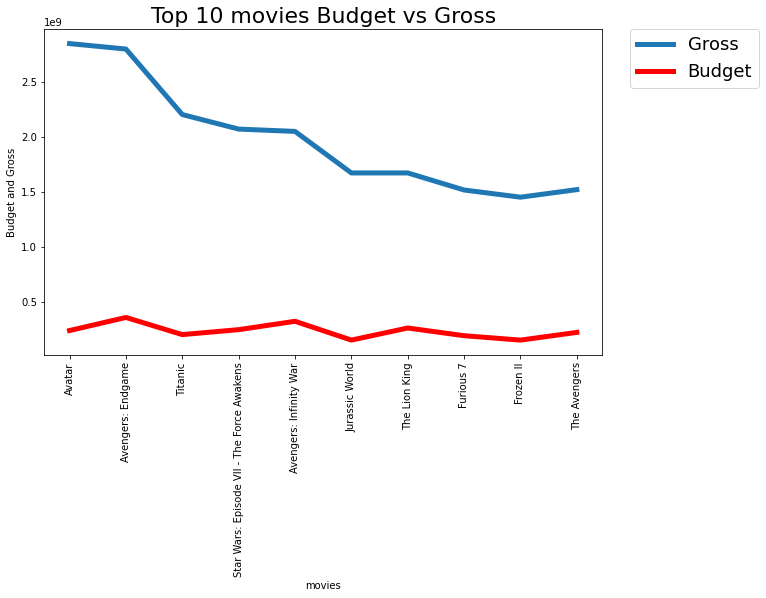

In [29]:
plt.figure(figsize=(10,6))

plt.plot(df_top10['name'],df_top10['gross'],linewidth = 5, label = 'Gross')
plt.plot(df_top10['name'],df_top10['budget'], color='red',linewidth = 5, label = 'Budget')

plt.title('Top 10 movies Budget vs Gross', fontsize = 22)
plt.xlabel('movies')
plt.ylabel('Budget and Gross')
plt.xticks(rotation=90)


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 18, borderaxespad=0.)


plt.show()

### We can see that Avatar is the most profitable movie over the years

# Conclusion

According to the analysis, we found that budget is highly correlated with the gross revenue. We also found that the most profitable genres were animated films, followed by action films, and the top 10 most profitable movies were mostly action movies. From the top 10 most profitable movies we can see that the profit is 4 to 8 times the budget.
Therefore, we can conclude that a higher budget will allow companies to produce high-quality movies that will generate higher revenue and net profit. It is recommended to invest more in popular movie genre, such as action and animation, in excahnge for higher profit.